# Introduction 

This project aims to establish a predictive model for the gym chain Model Fitness, which is facing challenges in identifying the reasons behind customer cancellations and seeks to develop more effective retention strategies.

1. We will establish the probabilities of customer churn for the upcoming month, based on historical patterns and current data.
2. We will develop detailed profiles of typical users to better understand their behaviors and needs.
3. We will analyze the key factors that influence churn, identifying the most determining variables for cancellations.
4. Finally, we will provide conclusions and strategic recommendations to help improve retention and reduce churn rates.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gym = gym.rename(str.lower, axis = 'columns')

print(gym.describe())


            gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

In [4]:
# Average values ​​for the cancellation and stay group

gym.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


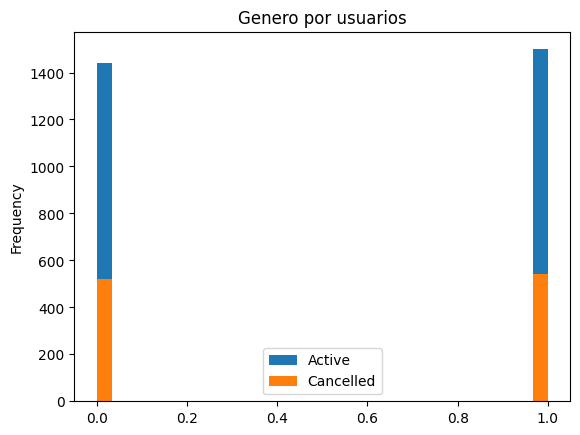

In [5]:
# Histograms for each feature

gym[gym['churn']== 0]['gender'].plot(kind = 'hist', bins = 30)
gym[gym['churn']== 1]['gender'].plot(kind = 'hist', bins = 30)

plt.legend(['Active', 'Cancelled'])
plt.title('Gender by users')
plt.show()

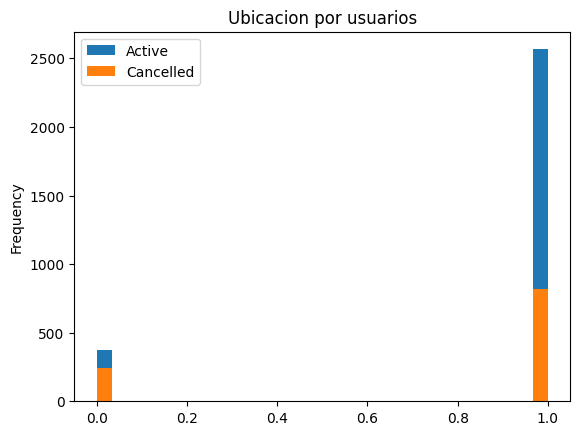

In [6]:
# Histograms for each feature

gym[gym['churn']== 0]['near_location'].plot(kind = 'hist', bins = 30)
gym[gym['churn']== 1]['near_location'].plot(kind = 'hist', bins = 30)

plt.legend(['Active', 'Cancelled'])
plt.title('Location by users')
plt.show()

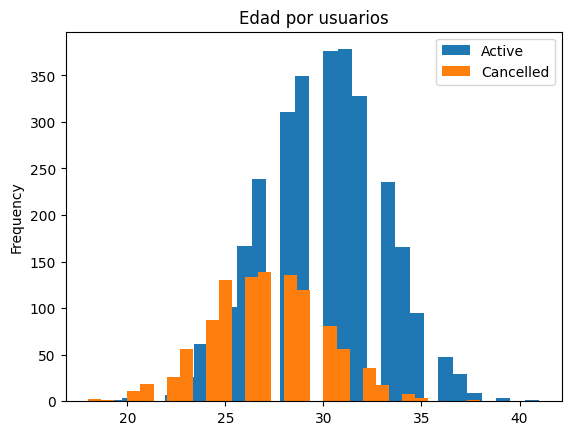

In [7]:
# Histograms for each feature

gym[gym['churn']== 0]['age'].plot(kind = 'hist', bins = 30)
gym[gym['churn']== 1]['age'].plot(kind = 'hist', bins = 30)

plt.legend(['Active', 'Cancelled'])
plt.title('Age by users')
plt.show()

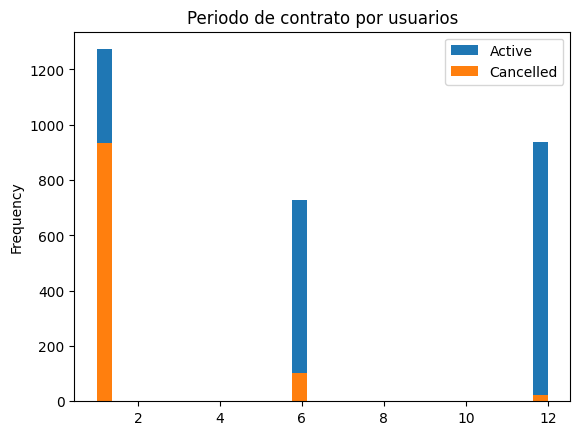

In [8]:
# Histograms for each feature

gym[gym['churn']== 0]['contract_period'].plot(kind = 'hist', bins = 30)
gym[gym['churn']== 1]['contract_period'].plot(kind = 'hist', bins = 30)

plt.legend(['Active', 'Cancelled'])
plt.title('Contract period per user')
plt.show()

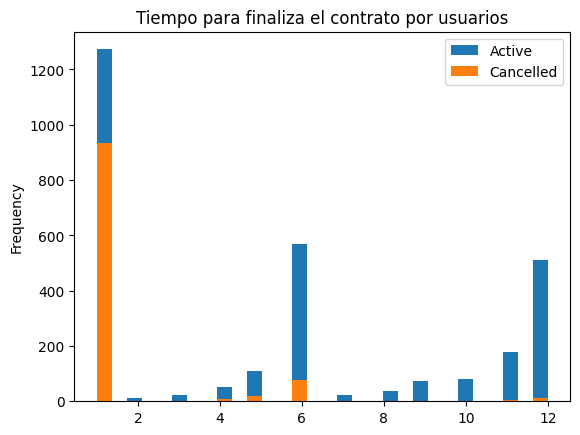

In [9]:
# Histograms for each feature

gym[gym['churn']== 0]['month_to_end_contract'].plot(kind = 'hist', bins = 30)
gym[gym['churn']== 1]['month_to_end_contract'].plot(kind = 'hist', bins = 30)

plt.legend(['Active', 'Cancelled'])
plt.title('Time to end the contract for users')
plt.show()

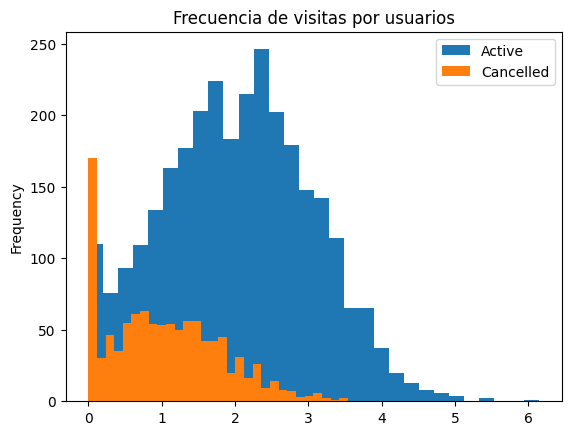

In [10]:
# Histograms for each feature

gym[gym['churn']== 0]['avg_class_frequency_current_month'].plot(kind = 'hist', bins = 30)
gym[gym['churn']== 1]['avg_class_frequency_current_month'].plot(kind = 'hist', bins = 30)

plt.legend(['Active', 'Cancelled'])
plt.title('Frequency of visits by users')
plt.show()

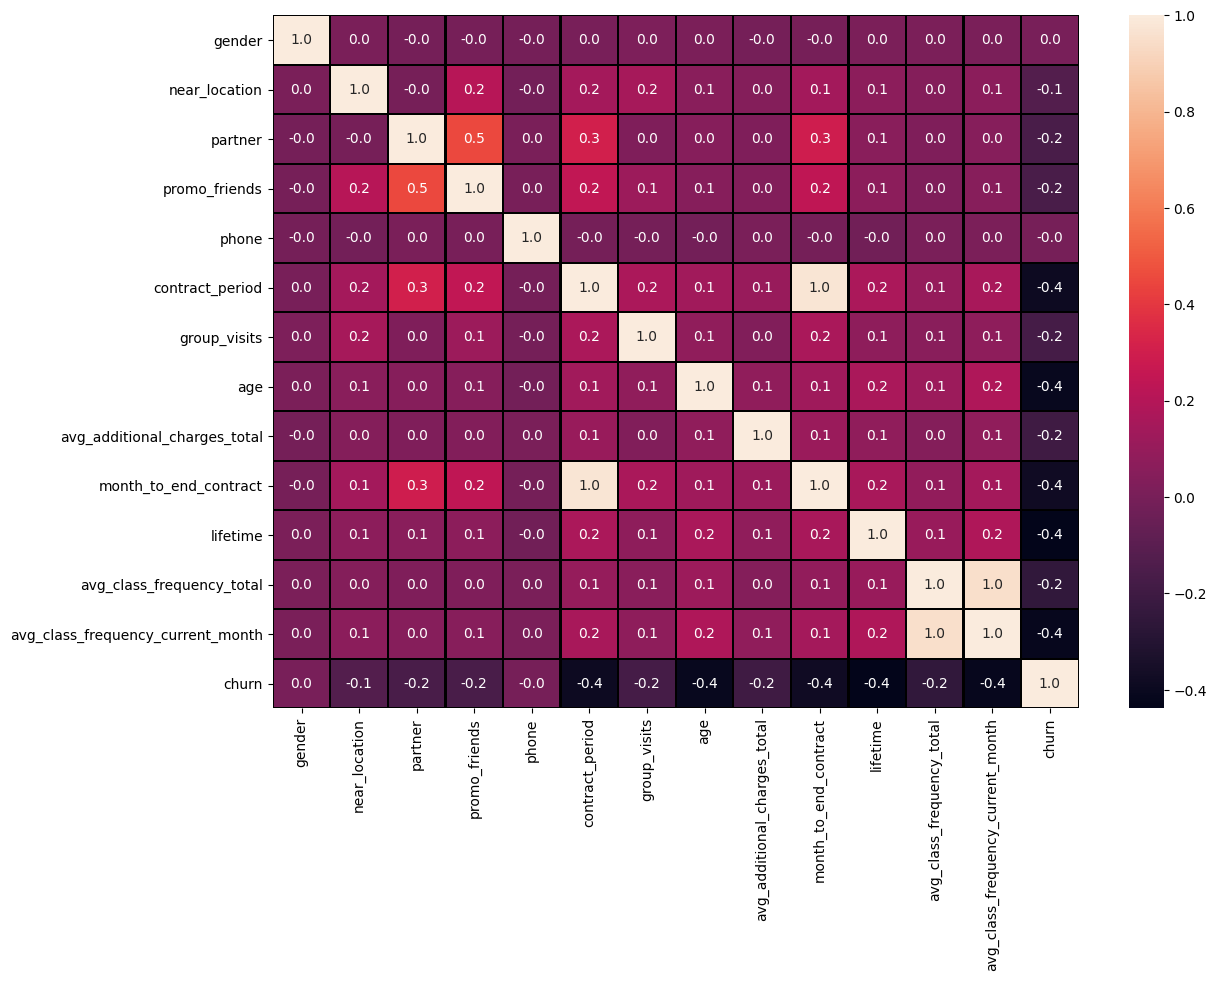

In [11]:
cm = gym.corr()

plt.figure(figsize = (13, 9))

sns.heatmap(cm, annot = True, fmt = ".1f", linewidths = 1, linecolor = 'black')

plt.show()

# Preliminary Hypotheses

We have taken into account several characteristics that can help us formulate hypotheses about the behavior of users who tend to cancel their gym subscriptions. This will allow us to anticipate and develop retention strategies.

1. Gender does not appear to be a determining factor when it comes to canceling subscriptions, as the behavior of both genders is very similar.
2. Although most users live near the gym, the cancellation rate is significantly higher for those who live farther away. However, this is not considered    a very determining characteristic, as the participation rate of these users is much lower compared to those living nearby.
3. Younger users tend to cancel their subscriptions more frequently, with fewer persisting compared to users over the age of 30.
4. Users who register for short-term contracts tend to cancel their subscriptions rather than renew them.
5. Similarly, users who attend the gym less frequently show a clear trend of canceling their subscriptions in the future.
   
With these hypotheses, we can make a preliminary prediction about users who are likely to cancel their subscriptions. We can state that: Users under 30, with one-month contracts and low attendance, present a high likelihood of cancellation.

In [17]:
# Selecting a model to predict user churn

X = gym.drop('churn', axis = 1)

y = gym['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)


lr_model = LogisticRegression()

lr_model.fit(X_train_st, y_train)

lr_predictions = lr_model.predict(X_test_st)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)


print('Logistic Regression Metrics')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, lr_predictions)))

print('Random Forest Metrics')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, rf_predictions)))

Metricas Regresion Logistica
Exactitud: 0.92
Precisión: 0.85
Recall: 0.83
Metricas Random Forest
Exactitud: 0.92
Precisión: 0.84
Recall: 0.81


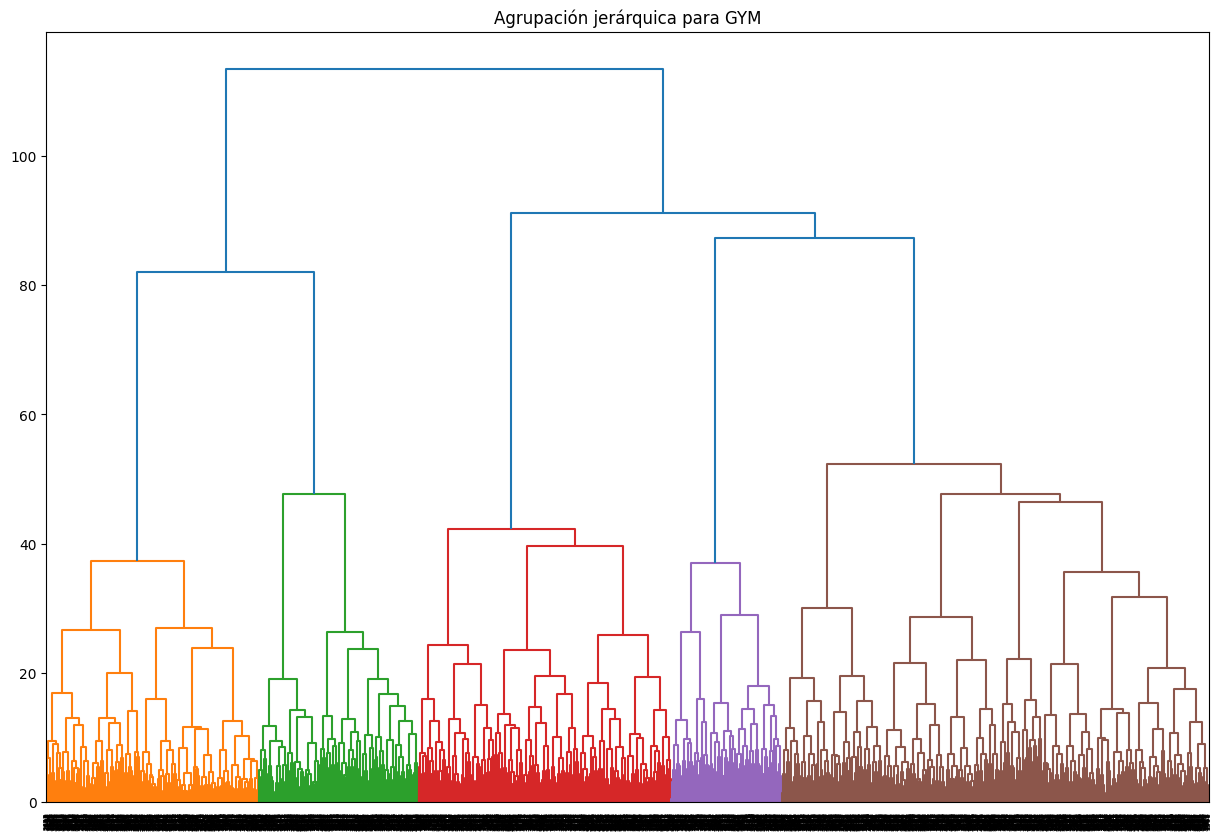

In [8]:
# User clusters
# Generation of the dendrogram
sc = StandardScaler()
x_sc = sc.fit_transform(gym)

linked = linkage(x_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical grouping for GYM')
plt.show()

In [11]:
# Cluster prediction

clients_cluster = KMeans(n_clusters = 5)

labels = clients_cluster.fit_predict(x_sc)

gym['cluster_clients'] = labels

gym.groupby(['cluster_clients']).mean()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_clients,,,,,,,,,,,,,,
0,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780
1,0.477193,0.826901,0.458480,0.264327,1.000000,2.761404,0.385965,30.023392,151.697815,2.552047,4.708772,1.156902,1.155437,0.001170
2,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875
3,0.548200,0.842044,0.368177,0.210221,0.998839,2.662021,0.437863,29.988386,160.419263,2.455285,4.572590,2.904624,2.911806,0.006969
4,0.502601,0.938606,0.766909,0.561915,1.000000,11.194589,0.557752,29.884495,162.890379,10.250780,4.689906,2.033051,2.027447,0.015609


In [21]:
# Calculation of cancellation rate per cluster

tasa_cancelacion = gym.groupby(['cluster_clients','churn'])['gender'].count()

tasa_cancelacion = tasa_cancelacion.reset_index()

calculo = tasa_cancelacion.pivot_table(index = 'cluster_clients', columns = 'churn', values = 'gender')
calculo = calculo.reset_index()
calculo['%_cancelacion'] = (calculo[1]/(calculo[0]+calculo[1]))*100

print(calculo)

churn  cluster_clients    0    1  %_cancelacion
0                    0  282  100      26.178010
1                    1  854    1       0.116959
2                    2    2  939      99.787460
3                    3  855    6       0.696864
4                    4  946   15       1.560874


# Final Conclusion

1. Upon validating the most effective methods for forecasting, we found that Logistic Regression is the technique that yields the best results across the metrics. Similarly, the Random Forest method also appears to be highly effective.

2. In the end, our clustering process helped validate our initial hypotheses. We found that Cluster Group 2 shares many characteristics with our        hypotheses. These users are the youngest, with an average age of 26.9, the lowest visit rate at 0.25, and the shortest contract period of 1.5 months.

# Recommendations

1. I recommend conducting an effective financial evaluation of the impact of cancellations, considering whether retaining these customers is truly      relevant. Since they are typically short-term customers, their cancellations may not significantly impact the overall results.

2. Additionally, it would be valuable to assess the revenue generated by loyal customers who maintain their subscriptions and potentially create better strategies to retain them, as they are the ones who most appreciate the gym's services.